In [1]:
!pip install --upgrade git+https://github.com/poplav/go_implementation.git

  Cloning https://github.com/poplav/go_implementation.git to /tmp/pip-req-build-v3e230xi
  Running setup.py bdist_wheel for Go-Implementation ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-j8g781zd/wheels/a9/2e/3d/de1212cf536dd8d0529b78422183c1deac467c6ad102f5f12b
Successfully built Go-Implementation
  Found existing installation: Go-Implementation 0.1.dev0
    Uninstalling Go-Implementation-0.1.dev0:
      Successfully uninstalled Go-Implementation-0.1.dev0


In [2]:
from go_implementation.base_implementation.go_sets import Position, WHITE, BLACK
from go_implementation.players.random_player import RandomPlayer
from go_implementation.game_simulators.game_simulator import GameSimulator
from go_implementation.players.maximal_next_score_player import MaximalNextScorePlayer
import time

### Simulate black random player against white random player

In [3]:
player_one = RandomPlayer(BLACK)
player_two = RandomPlayer(WHITE)
game_results = []
for i in range(20):
    game_sim = GameSimulator()
    start = time.time()
    game_state_history = game_sim.play_game(player_one, player_two)
    game_time = time.time() - start
    num_moves = len(game_state_history)
    game_score, player_move_time = game_state_history[-1][1:]
    game_results.append((game_time, num_moves, game_score, player_move_time['X'], player_move_time['O']))

### Simulate black random player against white maximize next score from available actions

In [4]:
player_one = RandomPlayer(BLACK)
player_two = MaximalNextScorePlayer(WHITE)
game_results_max_next = []
for i in range(20):
    game_sim = GameSimulator()
    start = time.time()
    game_state_history = game_sim.play_game(player_one, player_two)
    game_time = time.time() - start
    num_moves = len(game_state_history)
    game_score, player_move_time = game_state_history[-1][1:]
    game_results_max_next.append((game_time, num_moves, game_score, player_move_time['X'], player_move_time['O']))

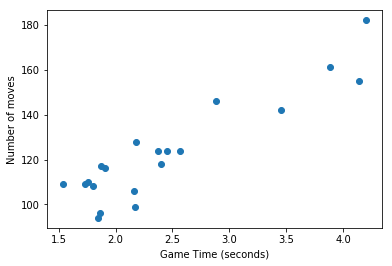

In [6]:
game_time_num_moves = [(stat[0], stat[1]) for stat in game_results]

import matplotlib.pyplot as plt
plt.scatter(*zip(*game_time_num_moves))
plt.xlabel('Game Time (seconds)')
plt.ylabel('Number of moves')
plt.show()

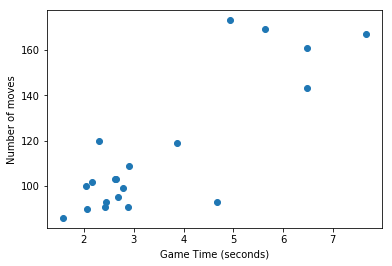

In [7]:
game_time_num_moves = [(stat[0], stat[1]) for stat in game_results_max_next]

import matplotlib.pyplot as plt
plt.scatter(*zip(*game_time_num_moves))
plt.xlabel('Game Time (seconds)')
plt.ylabel('Number of moves')
plt.show()

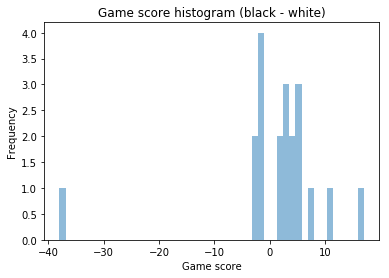

In [8]:
game_score = [stat[2] for stat in game_results]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(math.ceil(min(game_score)), 
                   math.floor(max(game_score)),
                   50) # fixed number of bins
plt.hist(game_score, bins = bins, alpha = 0.5)
plt.title('Game score histogram (black - white)')
plt.xlabel('Game score')
plt.ylabel('Frequency')
plt.show()

In [9]:
game_score = [stat[2] for stat in game_results]
import numpy as np
print("mean = ", np.mean(game_score))
print("std = ", np.std(game_score))

mean =  1.05
std =  10.170914413168562


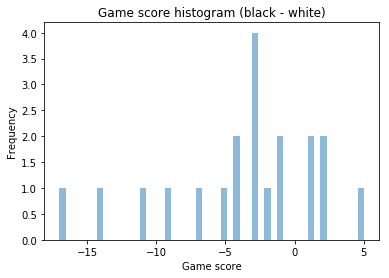

In [10]:
game_score = [stat[2] for stat in game_results_max_next]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(math.ceil(min(game_score)), 
                   math.floor(max(game_score)),
                   50) # fixed number of bins
plt.hist(game_score, bins = bins, alpha = 0.5)
plt.title('Game score histogram (black - white)')
plt.xlabel('Game score')
plt.ylabel('Frequency')
plt.show()

In [11]:
game_score = [stat[2] for stat in game_results_max_next]
import numpy as np
print("mean = ", np.mean(game_score))
print("std = ", np.std(game_score))

mean =  -3.8
std =  5.390732788777421


/home/p-mpoplavski/envs/audience-env-research-32-d8b7a0/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/p-mpoplavski/envs/audience-env-research-32-d8b7a0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/p-mpoplavski/envs/audience-env-research-32-d8b7a0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kw

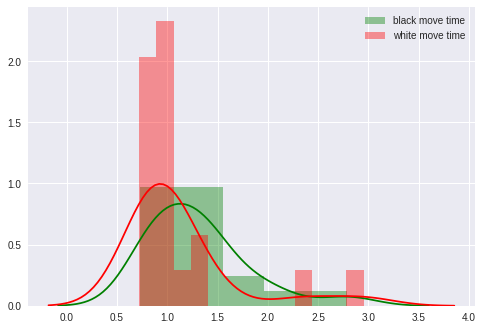

In [12]:
black_move_time = [stat[3] for stat in game_results]
white_move_time = [stat[4] for stat in game_results]
import seaborn as sns
sns.distplot(black_move_time , color="green", label="black move time")
sns.distplot(white_move_time, color="red", label="white move time")
sns.plt.legend()
sns.plt.show()

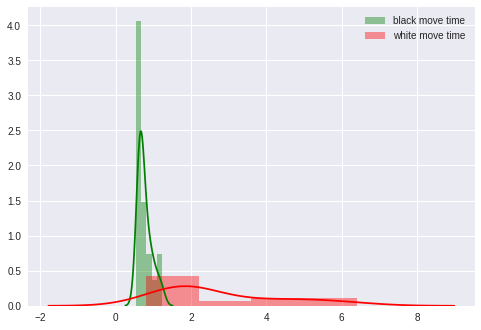

In [13]:
black_move_time = [stat[3] for stat in game_results_max_next]
white_move_time = [stat[4] for stat in game_results_max_next]
import seaborn as sns
sns.distplot(black_move_time , color="green", label="black move time")
sns.distplot(white_move_time, color="red", label="white move time")
sns.plt.legend()
sns.plt.show()

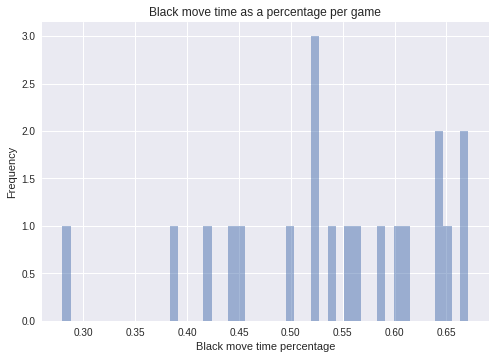

In [14]:
black_move_time_percent_per_game = [stat[3] / (stat[3] + stat[4]) for stat in game_results]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(min(black_move_time_percent_per_game), 
                   max(black_move_time_percent_per_game),
                   50) # fixed number of bins
plt.hist(black_move_time_percent_per_game, bins = bins, alpha = 0.5)
plt.title('Black move time as a percentage per game')
plt.xlabel('Black move time percentage')
plt.ylabel('Frequency')
plt.show()

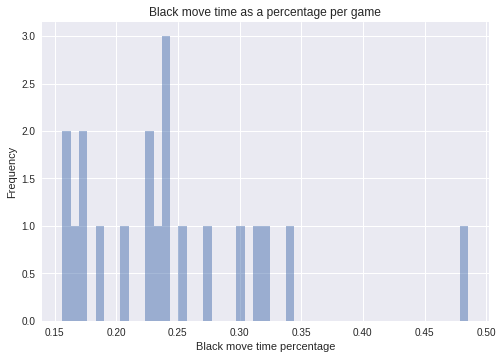

In [15]:
black_move_time_percent_per_game = [stat[3] / (stat[3] + stat[4]) for stat in game_results_max_next]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(min(black_move_time_percent_per_game), 
                   max(black_move_time_percent_per_game),
                   50) # fixed number of bins
plt.hist(black_move_time_percent_per_game, bins = bins, alpha = 0.5)
plt.title('Black move time as a percentage per game')
plt.xlabel('Black move time percentage')
plt.ylabel('Frequency')
plt.show()